In [9]:
require 'loadcaffe'
require 'image'
prototxt = '../../Data/VGG_caffe/VGG_ILSVRC_16_layers_deploy.prototxt'
binary = '../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel'

-- this will load the network and print it's structure
net = loadcaffe.load(prototxt, binary);


Successfully loaded ../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel


conv1_1: 64 3 3 3
conv1_2: 64 64 3 3
conv2_1: 128 64 3 3


conv2_2: 128 128 3 3


conv3_1: 256 128 3 3


conv3_2: 256 256 3 3


conv3_3: 256 256 3 3


conv4_1: 512 256 3 3


conv4_2: 512 512 3 3


conv4_3: 512 512 3 3


conv5_1: 512 512 3 3


conv5_2: 512 512 3 3


conv5_3: 512 512 3 3


fc6: 1 1 25088 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [10]:
-- Loads the mapping from net outputs to human readable labels
function load_synset()
  local list = {}
  for line in io.lines'synset_words.txt' do
    table.insert(list, string.sub(line,11))
  end
  return list
end

function preprocess(img) 
-- 16 layer VGG expects a 3x224x224 sized image
  img = image.scale(img, 224, 224)
-- Directly obtained from the website
  local mean_pixel = torch.DoubleTensor({103.939, 116.779, 123.68})
-- Permuting from RBG to BGR
  local perm = torch.LongTensor{3, 2, 1}
-- Scaling the elements from 0:1 to 0:256
  img = img:index(1, perm):mul(256.0)
  mean_pixel = mean_pixel:view(3, 1, 1):expandAs(img)
-- Subtracting the mean
  img:add(-1, mean_pixel)
  return img
end

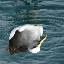

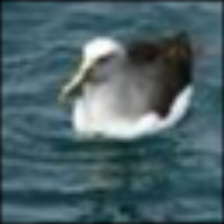

In [11]:
image_name = '../../Data/tiny-imagenet-200/test/images/test_4.JPEG'
-- loading thr image
im1 = image.load(image_name)
-- Rotating the image by 180 degree
im = image.rotate(im1,3.14159)
-- Display 
itorch.image(im) -- rescale just to show the image-- displaying the image

-- Convolving with a smoothing filter 
conv_kernel = torch.ones(2,2)
imc = image.convolve(im1,conv_kernel,'full')
itorch.image(image.scale(imc, 224, 224)) -- rescale just to show the image-- displaying the image
im = preprocess(im)


In [12]:
-- Preprocessing the image so and then feeding it to the VGG net.
prob,classes = net:forward(im):view(-1):sort(true) -- forward pass > resize to a single column > sort

In [13]:
-- Printing the class predicted by VGG net.
synset_words = load_synset()

for i=1,5 do
  print('predicted class '..tostring(i)..': ', synset_words[classes[i]])
end

predicted class 1: 	ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus	
predicted class 2: 	dugong, Dugong dugon	
predicted class 3: 	brown bear, bruin, Ursus arctos	
predicted class 4: 	sea lion	
predicted class 5: 	killer whale, killer, orca, grampus, sea wolf, Orcinus orca	


In [14]:
-- Accessing intermediate layers
layer_1 = net.modules[2].output
print(layer_1)


not enough memory: 

In [8]:
rescaled_layer_1 = image.scale(layer_1,224,224,'simple');
itorch.image(rescaled_layer_1)

not enough memory: 

In [10]:
-- Creating the hypercolumns
layer_1 = net.modules[5].output;
hyper_columns = image.scale(layer_1,224,224,'simple');
layer_nums = {9,16,23,30}
for i=1,3 do
    layer = net.modules[layer_nums[i]].output
    hyper_columns = torch.cat(hyper_columns,image.scale(layer,224,224,'simple'),1)
end
    

In [11]:
--itorch.image(image.scale(hyper_columns,224,224))
itorch.image(hyper_columns)

not enough memory: 

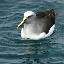

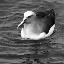

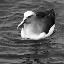

In [15]:
require("Utils")
image_name = '../../Data/tiny-imagenet-200/test/images/test_4.JPEG'
-- loading thr image
im = image.load(image_name)
itorch.image(im)
-- Calling the rgb2gray function
grayim = rgb2gray(im)
itorch.image(grayim)
-- Calling the gray2rbg function

grayim3 = gray2rgb(grayim)
itorch.image(grayim3)